In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import seaborn as sns
from pylab import *

In [36]:
df = pd.read_excel(r"E:\Data Science\Assignment-4\play.xlsx")
print(df)

     Outlook  Temperature  Humidity   Windy   Decision
0   overcast           72        90  strong       play
1   overcast           83        78    weak       play
2   overcast           64        65  strong       play
3   overcast           81        75    weak       play
4      sunny           75        70  strong       play
5      sunny           80        90  strong  dont_play
6      sunny           85        85    weak  dont_play
7      sunny           72        95    weak  dont_play
8      sunny           69        70    weak       play
9       rain           71        80  strong  dont_play
10      rain           65        70  strong  dont_play
11      rain           75        80    weak       play
12      rain           68        80    weak       play
13      rain           70        96    weak       play


In [37]:
x = df[['Outlook','Temperature','Humidity','Windy','Decision']]

In [5]:
x.shape

(14, 5)

In [6]:
le_Outlook = LabelEncoder()
le_Windy = LabelEncoder()
le_Decision = LabelEncoder()

In [7]:
df['Outlook_n'] = le_Outlook.fit_transform(df['Outlook'])
df['Windy_n'] = le_Windy.fit_transform(df['Windy'])
df['Decision_n'] = le_Decision.fit_transform(df['Decision'])
df.head()

,Outlook,Temperature,Humidity,Windy,Decision,Outlook_n,Windy_n,Decision_n
0,overcast,72,90,strong,play,0,0,1
1,overcast,83,78,weak,play,0,1,1
2,overcast,64,65,strong,play,0,0,1
3,overcast,81,75,weak,play,0,1,1
4,sunny,75,70,strong,play,2,0,1


In [8]:
data = df.drop(['Outlook','Windy','Decision'],axis="columns")
data

,Temperature,Humidity,Outlook_n,Windy_n,Decision_n
0,72,90,0,0,1
1,83,78,0,1,1
2,64,65,0,0,1
3,81,75,0,1,1
4,75,70,2,0,1
5,80,90,2,0,0
6,85,85,2,1,0
7,72,95,2,1,0
8,69,70,2,1,1
9,71,80,1,0,0


In [13]:
x1 = df[['Outlook_n','Temperature','Humidity','Windy_n','Decision_n']]

In [14]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=5, n_init = 4, init = "random", random_state = 42)
km.fit(x1)
y_kmeans = km.predict(x1)
y_kmeans

array([2, 1, 3, 1, 1, 4, 4, 2, 3, 0, 3, 0, 0, 2])

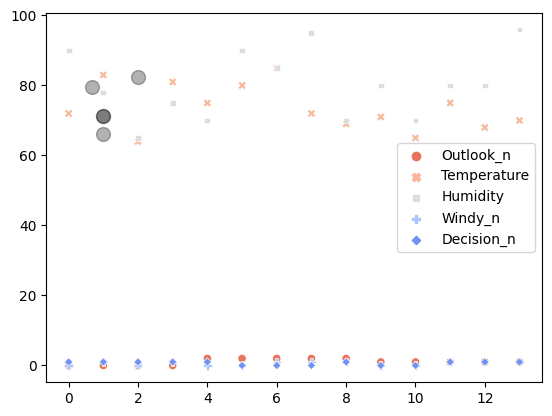

In [24]:
import seaborn as sns
sns.scatterplot(x1,palette = "coolwarm_r")
centers = km.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha = 0.3);

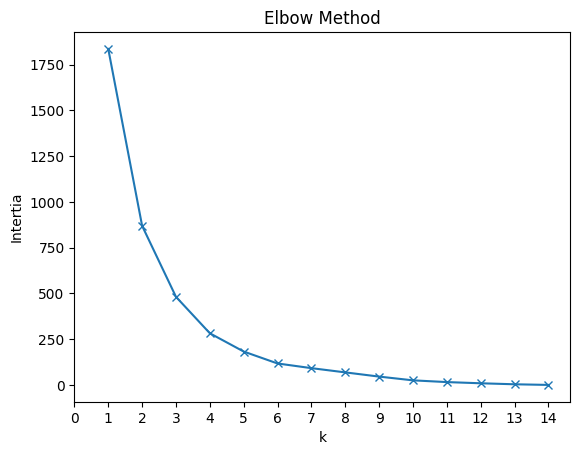

In [26]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x1)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()